# Datasets 

There are several Python libraries which provide solid implementations of a range of machine learning algorithms. 

1. One of the best known is [Scikit-Learn](http://scikit-learn.org), a package that provides efficient versions of a large number of common algorithms. Scikit-Learn has very useful and complete online documentation and comes with several standard [datasets](https://scikit-learn.org/stable/datasets.html). In the first half of the class we will use Scikit-learn to illustrate the basics.

2. Another popular package is [Keras](https://keras.io/getting_started/) which also comes with several widely used [datasets](https://keras.io/api/datasets/). In the second half of the semester we will use Keras for deep learning.

# Data Representation

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer.
The best way to think about data within Scikit-Learn is in terms of tables of data, known as **dataframe**.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

(10.0, -2.0)

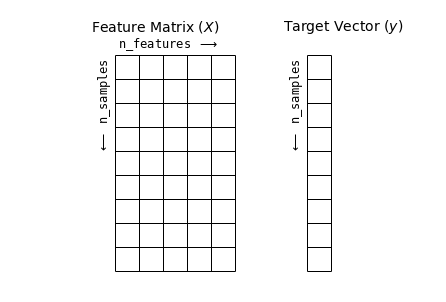

In [ ]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.axis('equal')

# Draw features matrix
ax.vlines(range(6), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=0, xmax=5, lw=1)
font_prop = dict(size=12, family='monospace')
ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
ax.text(-0.1, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

# Draw labels vector
ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=8, xmax=9, lw=1)
ax.text(7, -1, "Target Vector ($y$)", size=14)
ax.text(7.9, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

ax.set_ylim(10, -2)

#fig.savefig('figures/05.02-samples-features.png')

## Features matrix


The information can be thought of as a two-dimensional numerical array or matrix, which we will call the **features matrix**.
By convention, this features matrix is often stored in a variable named ``X``.
The features matrix is assumed to be two-dimensional, with shape ``[n_samples, n_features]``, and is most often contained in a NumPy array or a Pandas ``DataFrame``, though some Scikit-Learn models also accept SciPy sparse matrices.

The **samples** (i.e., rows) always refer to the individual objects described by the dataset.
For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The **features** (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.
Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

## Target array

In addition to the feature matrix ``X``, we also generally work with a **label** or **target** array, which by convention we will usually call ``y``.
The target array is usually one dimensional, with length ``n_samples``, and is generally contained in a NumPy array or Pandas ``Series``.
The target array may have continuous numerical values, or discrete classes/labels.

Often one point of confusion is how the target array differs from the other features columns. The distinguishing feature of the target array is that it is usually the quantity we want to predict from the data: in statistical terms, the **target** is the **dependent variable**, while the **features** can be thought of as the **independent variables**.

1. When the target variable (label) is continuous, we are dealing with a **regression** problem.

2. When the target variable (label) is discrete, we are dealing with a **classification** problem.


# Scikit-learn datasets: examples

## The Iris plants dataset

First let's consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.
We can download this dataset in the form of a Pandas ``DataFrame`` using the [seaborn](http://seaborn.pydata.org/) library:

In [ ]:
#import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset.
In general, we will refer to the rows of the matrix as **samples**, and the number of rows as ``n_samples``.

Likewise, each column of the data refers to a particular quantitative piece of information that describes each sample.
In general, we will refer to the columns of the matrix as **features**, and the number of columns as ``n_features``.

We can now use Seaborn (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)) to conveniently visualize the data:

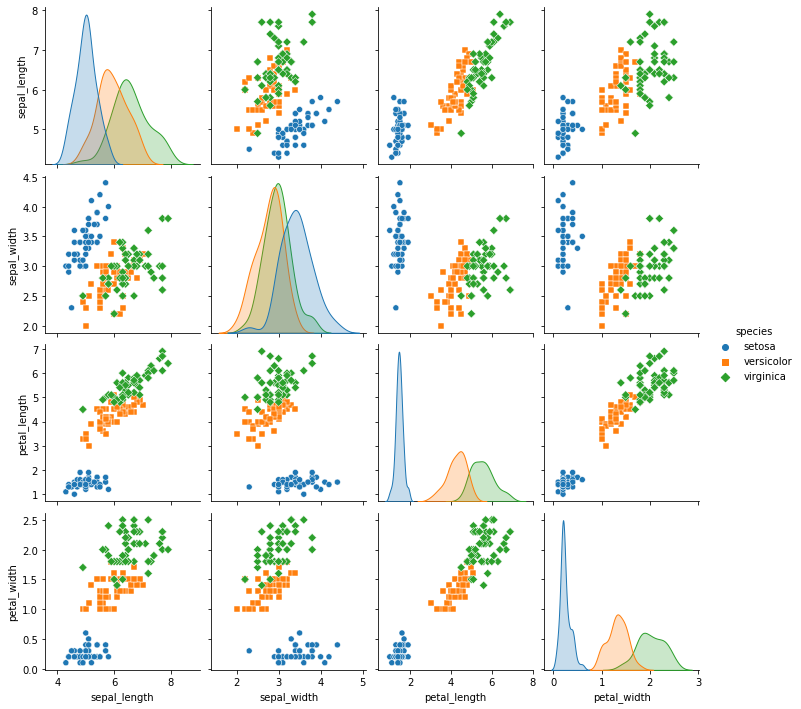

In [ ]:
sns.pairplot(iris, hue='species', height=2.5, markers=["o","s","D"]);

## MNIST dataset of handwritten digits (8x8)

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

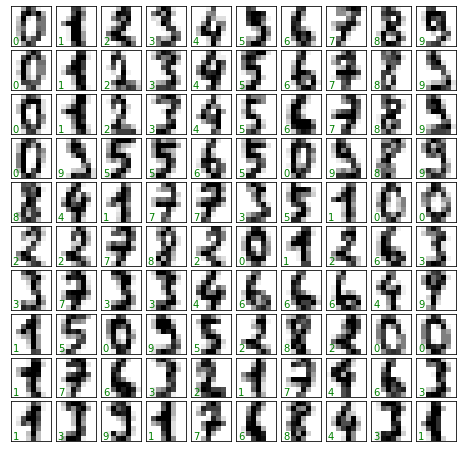

In [ ]:
#import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [ ]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

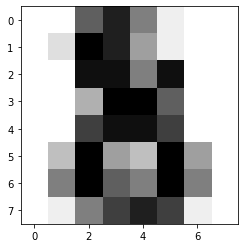

This is supposed to be a  8


In [ ]:
i = 1796
image = digits.images[i]
fig = plt.figure
plt.imshow(image, cmap='binary')
plt.show()
print('This is supposed to be a ', str(digits.target[i]))

## Simulation datasets: make_blobs

Generate isotropic Gaussian blobs for clustering.

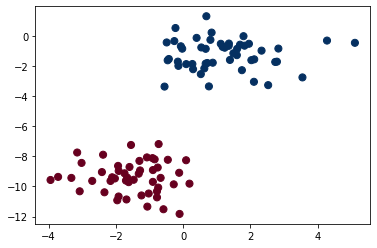

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

(10, 2)
[0 0 1 0 2 2 2 1 1 0]


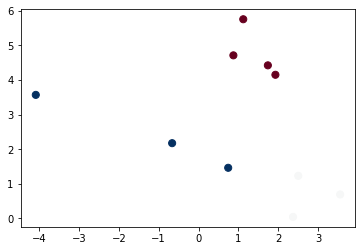

In [ ]:
#from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2, random_state=0)
print(X.shape)
print(y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

**Exercise: How many points are on this plot?**

## Team exercises

Your mission, should you choose to accept it, is to load and visualize some of the other datasets provided in scikit-learn. A few options:

1. boston house-prices dataset
2. wine dataset
3. make circles
4. make moons
5. anything else you choose


# Keras datasets: examples

## The MNIST dataset of handwritten digits (28x28)

Let's use the Python library Keras to load the handwritten digits from the MNIST dataset: 28x28 pixels of grayscale images, labelled into 10 categories (0 through 9). The MNIST dataset has 60,000 training images and 10,000 test images. 

In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

The MNIST dataset comes preloaded in Keras as a set of four Numpy arrays: train_images and train_labels form the training set, while test_images and test_labels form the test set. 

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Training data

Look at the training data first: note that the grayscale is an integer between 0 and 255. We will have to rescale it later to be between 0 and 1.



In [ ]:
train_images[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Look at a few examples:

This training image is supposed to be a  5


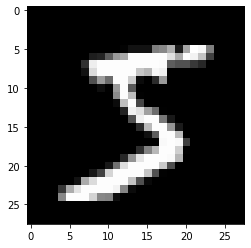

In [ ]:
# show one training sample
i = 0
print("This training image is supposed to be a ", train_labels[i])
image = train_images[i]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

### Test data

Then look at the test data:

In [ ]:
test_images[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

This is supposewd to be a  7


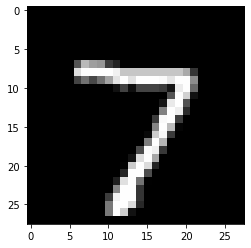

In [ ]:
# show one test sample
i = 0
print("This test image is supposed to be a ", test_labels[i])
image = test_images[i]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

## Team exercise: The Boston housing market dataset

Team exercise: load the Boston housing market dataset and try to figure out what it represents. 

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
X= load_boston()
df = pd.DataFrame(X.data, columns=X.feature_names)
df['target'] = X.target
print(df.head())


      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  target
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98    24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14    21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03    34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94    33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33    36.2

[5 rows x 14 columns]
